In [95]:
import os

In [96]:
data_dir = 'D:\\mini project\\dataset\\Grape'

In [97]:
os.listdir(data_dir)

['grape']

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.regularizers import l2

In [99]:
from matplotlib.image import imread

In [100]:
grape = data_dir + '\\grape\\'


In [101]:
os.listdir(grape)

['black_rot', 'grape_esca', 'grape_healthy', 'grape_leaf_blight']

In [102]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [103]:
directory_root = 'D:\\mini project\\dataset\\Grape'

In [104]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = os.listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = os.listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:382]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(imread(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing black_rot ...
[INFO] Processing grape_esca ...
[INFO] Processing grape_healthy ...
[INFO] Processing grape_leaf_blight ...
[INFO] Image loading completed


In [105]:
len(image_list)

1528

In [106]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

In [107]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl','wb'))
n_classes = len(label_binarizer.classes_)

In [108]:
print(label_binarizer.classes_)

['black_rot' 'grape_esca' 'grape_healthy' 'grape_leaf_blight']


In [109]:
np_image_list = np.array(image_list,dtype = np.float16)/255

In [110]:
np_image_list.shape

(1528, 256, 256, 3)

In [111]:
len(image_list)

1528

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.4, random_state=101)

In [114]:
image_gen = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
                               zoom_range=0.1,
                               fill_mode='nearest',
                               horizontal_flip=True,
                               rotation_range=25,
                               shear_range=0.2
                              )

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K

In [116]:
input_shape=(256,256,3)

In [117]:
height =256
width = 256
depth = 3

In [118]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [119]:
model=Sequential()
input_shape = (height,width,depth)


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes,kernel_regularizer=l2(0.01),activation='softmax'))

model.compile(loss='squared_hinge',optimizer='adam',metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)      

In [49]:
history = model.fit_generator(image_gen.flow(X_train,y_train),validation_data=(X_test,y_test),epochs=20,callbacks=[early_stop])

C:\Users\Mudit\anaconda_3.1\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
29/29 [==============================] - 56s 2s/step - loss: 1.3687 - accuracy: 0.2893 - val_loss: 1.3080 - val_accuracy: 0.4820
Epoch 2/20
29/29 [==============================] - 52s 2s/step - loss: 1.1875 - accuracy: 0.5535 - val_loss: 1.0921 - val_accuracy: 0.6569
Epoch 3/20
29/29 [==============================] - 51s 2s/step - loss: 1.0888 - accuracy: 0.6714 - val_loss: 1.0699 - val_accuracy: 0.6895
Epoch 4/20
29/29 [==============================] - 55s 2s/step - loss: 1.0248 - accuracy: 0.7314 - val_loss: 1.0927 - val_accuracy: 0.6618
Epoch 5/20
29/29 [==============================] - 53s 2s/step - loss: 1.0087 - accuracy: 0.7566 - val_loss: 0.9866 - val_accuracy: 0.7729
Epoch 6/20
29/29 [==============================] - 52s 2s/step - loss: 0.9761 - accuracy: 0.7817 - val_loss: 1.0838 - val_accuracy: 0.6601
Epoch 7/20
29/29 [==============================] - 52s 2s/step - loss: 0.9492 - accuracy: 0.8155 - val_loss: 1.1059 - val_accuracy: 0.6454
Epoch 8/20
29/29 [==

In [53]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

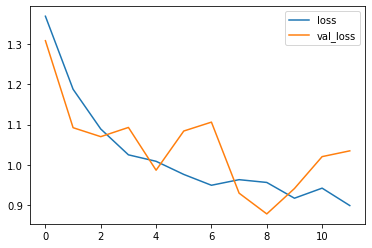

In [54]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

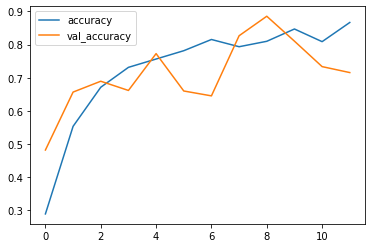

In [55]:
metrics[['accuracy','val_accuracy']].plot()

In [56]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 9s 289ms/step - loss: 1.0346 - accuracy: 0.7157


[1.0346366167068481, 0.7156862616539001]

In [57]:
pred = model.predict(X_test)

In [58]:
pred

array([[7.5106703e-02, 4.7478764e-04, 2.5471977e-06, 9.2441607e-01],
       [4.3331042e-18, 2.8322387e-18, 1.0129331e-18, 1.0000000e+00],
       [3.7324443e-02, 5.5849151e-04, 9.0485036e-01, 5.7266727e-02],
       ...,
       [4.0991806e-12, 1.0000000e+00, 0.0000000e+00, 4.4151973e-18],
       [8.6186543e-02, 1.1393451e-02, 8.9018345e-01, 1.2236574e-02],
       [9.9912411e-01, 1.4357109e-04, 1.2792091e-07, 7.3225336e-04]],
      dtype=float32)

In [88]:
os.listdir( "D:\\mini project\\dataset\\Grape\\grape\\grape_esca")

['0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG',
 '00b65fe8-cee1-4b68-8ef4-1211814f2845___FAM_B.Msls 3990.JPG',
 '00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197.JPG',
 '01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153.JPG',
 '011bb69d-fb9c-4fb9-b8cc-031e91270ec2___FAM_B.Msls 4288.JPG',
 '011f307f-e06b-4604-9419-d940f7b00290___FAM_B.Msls 1096.JPG',
 '019afd88-6645-44c4-a5d2-bd583b877a50___FAM_B.Msls 1744.JPG',
 '01c74b8d-1113-47c0-86a3-6ceea27853c0___FAM_B.Msls 4113.JPG',
 '02223cc6-30d2-408d-a091-65257d044a50___FAM_B.Msls 0908.JPG',
 '023df989-ab4c-4f66-a6c8-a41c1142ab7d___FAM_B.Msls 1834.JPG',
 '025a9fa7-827a-43c3-a82f-66d9cbfb2055___FAM_B.Msls 4282.JPG',
 '0279ec2c-5470-47e8-b1ba-79442bd323bb___FAM_B.Msls 4396.JPG',
 '02af0429-46c1-444b-bf62-a4d0198141e8___FAM_B.Msls 1062.JPG',
 '0336e894-5963-4a7e-9b56-e802473ae4c5___FAM_B.Msls 1231.JPG',
 '037b6ea5-3d81-4489-b7a3-1116ee2cc6e1___FAM_B.Msls 0944.JPG',
 '03c1559d-52a2-455f-b682-5c3d266b05b7___FAM_B.Msls 381

In [89]:
image_dir = "D:\\mini project\\dataset\\Grape\\grape\\grape_esca\\01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153.JPG"



In [90]:
im =imread(image_dir)

In [91]:

np_image_li = np.array(im,dtype = np.float16)/255
npp_image = np.expand_dims(np_image_li, axis=0)

In [92]:
result = model.predict(npp_image)

In [93]:
print(result)

[[1.4985802e-30 1.0000000e+00 0.0000000e+00 6.6307675e-36]]


In [94]:
itemindex = np.where(result==np.max(result))
print('probablity:'+str(np.max(result))+'\n'+label_binarizer.classes_[itemindex[1][0]])

probablity:1.0
grape_esca
